#### Data Understanding

Looking at the weight data loss dataset from https://www.kaggle.com/datasets/tombenny/foodhabbits

Let's check this dataset and see if there are features like diet, exercise that contribute to a target feature indicating whether thier was weight loss or not

#### Collect Initial Data 
Using Kaggle web site, did a search for Weight loss datasets - https://www.kaggle.com/search?q=weight+loss+in%3Adatasets

Identified the  weight data loss dataset using diet from https://www.kaggle.com/datasets/tombenny/foodhabbits


This Notebook uses Linear Regression to find out if this dataset can be used to build a ML Model that we can use to predict weight loss based on diets information provided by the users

In [1]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

from sklearn.linear_model import LinearRegression, Ridge
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from sklearn.preprocessing import OneHotEncoder, PolynomialFeatures, StandardScaler, MinMaxScaler
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.inspection import permutation_importance
from sklearn.pipeline import Pipeline

In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
pd.set_option('display.max_colwidth', None)

In [4]:
# Read weight loss data file into DataFrame
weightloss_data_df = pd.read_csv("../data/foodDiet.csv")
weightloss_data_df.head(10)

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
0,25,0,41,171,60,2,60.0
1,26,0,32,174,103,2,103.0
2,1,0,22,159,58,1,54.2
3,2,0,46,192,60,1,54.0
4,3,0,55,170,64,1,63.3
5,4,0,33,171,64,1,61.1
6,5,0,50,170,65,1,62.2
7,6,0,50,201,66,1,64.0
8,7,0,37,174,67,1,65.0
9,8,0,28,176,69,1,60.5


In [5]:
# Information on the features
weightloss_data_df.info

<bound method DataFrame.info of     Person  gender  Age  Height  pre.weight  Diet  weight6weeks
0       25       0   41     171          60     2          60.0
1       26       0   32     174         103     2         103.0
2        1       0   22     159          58     1          54.2
3        2       0   46     192          60     1          54.0
4        3       0   55     170          64     1          63.3
..     ...     ...  ...     ...         ...   ...           ...
73      74       1   35     183          83     3          80.2
74      75       1   49     177          84     3          79.9
75      76       1   28     164          85     3          79.7
76      77       1   40     167          87     3          77.8
77      78       1   51     175          88     3          81.9

[78 rows x 7 columns]>

In [6]:
# Information on the features
weightloss_data_df.corr()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks
Person,1.000000,0.308313,-0.101773,-0.033696,0.296399,0.942237,0.196728
gender,0.308313,1.000000,0.018422,0.337974,0.642679,0.023479,0.611748
Age,-0.101773,0.018422,1.000000,0.080393,-0.006265,-0.127707,0.010472
Height,-0.033696,0.337974,0.080393,1.000000,0.154381,-0.118241,0.183998
pre.weight,0.296399,0.642679,-0.006265,0.154381,1.000000,0.039234,0.958449
Diet,0.942237,0.023479,-0.127707,-0.118241,0.039234,1.000000,-0.048050
weight6weeks,0.196728,0.611748,0.010472,0.183998,0.958449,-0.048050,1.000000


### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling. Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with sklearn.

In [7]:
#check if there are any null values
# Print percentage of Columns that are null in relation to the total number of columns
for column in weightloss_data_df.columns:
    if weightloss_data_df[column].isnull().sum() > 0:
        print(column, ': {:.2%}'.format(weightloss_data_df[column].isnull().sum() /
                                               weightloss_data_df[column].shape[0]))

In [8]:
#Check the number of Null Columns
weightloss_data_df.isnull().sum()

Person          0
gender          0
Age             0
Height          0
pre.weight      0
Diet            0
weight6weeks    0
dtype: int64

In [9]:
# Calculate weight loss flag
weightloss_data_df['weightloss'] = np.where(weightloss_data_df['pre.weight'] > weightloss_data_df['weight6weeks'], 1, 0)
weightloss_data_df


,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightloss
0,25,0,41,171,60,2,60.0,0
1,26,0,32,174,103,2,103.0,0
2,1,0,22,159,58,1,54.2,1
3,2,0,46,192,60,1,54.0,1
4,3,0,55,170,64,1,63.3,1
...,...,...,...,...,...,...,...,...
73,74,1,35,183,83,3,80.2,1
74,75,1,49,177,84,3,79.9,1
75,76,1,28,164,85,3,79.7,1
76,77,1,40,167,87,3,77.8,1


In [61]:
# saving the dataframe
weightloss_data_df.to_csv('../data/foodDiet-weightloss.csv')

In [11]:
# Review the correlation of the dataset
weightloss_data_df.corr()

,Person,gender,Age,Height,pre.weight,Diet,weight6weeks,weightloss
Person,1.000000,0.308313,-0.101773,-0.033696,0.296399,0.942237,0.196728,0.115394
gender,0.308313,1.000000,0.018422,0.337974,0.642679,0.023479,0.611748,0.052438
Age,-0.101773,0.018422,1.000000,0.080393,-0.006265,-0.127707,0.010472,0.053889
Height,-0.033696,0.337974,0.080393,1.000000,0.154381,-0.118241,0.183998,-0.047566
pre.weight,0.296399,0.642679,-0.006265,0.154381,1.000000,0.039234,0.958449,-0.076861
Diet,0.942237,0.023479,-0.127707,-0.118241,0.039234,1.000000,-0.048050,0.073314
weight6weeks,0.196728,0.611748,0.010472,0.183998,0.958449,-0.048050,1.000000,-0.225261
weightloss,0.115394,0.052438,0.053889,-0.047566,-0.076861,0.073314,-0.225261,1.000000


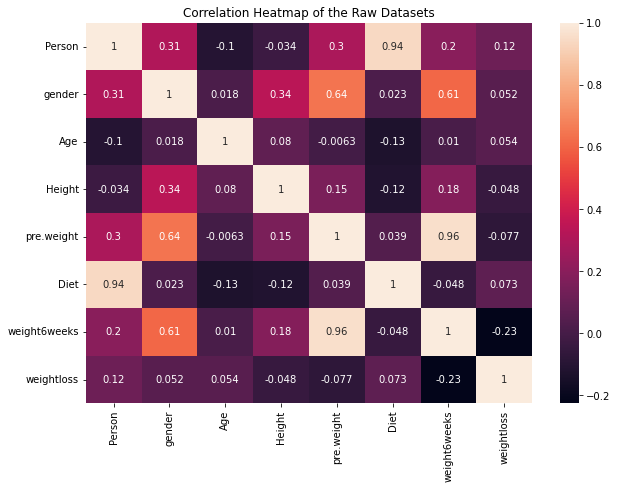

In [12]:
# Now lets look at some visualization of the provided datasets

fig, ax = plt.subplots(figsize=(10,7))
plt.rcParams["figure.autolayout"] = True

#create seaborn heatmap
ax = sns.heatmap(weightloss_data_df.corr(), annot = True)

# Adding Title to the Plot
ax.set_title("Correlation Heatmap of the Raw Datasets")
manager = plt.get_current_fig_manager()
manager.full_screen_toggle()
plt.show()

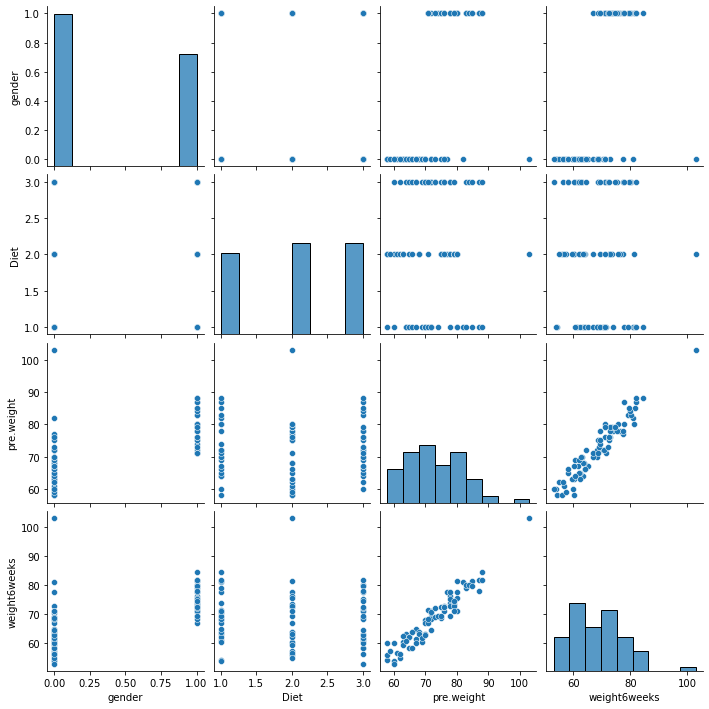

In [33]:
# Now lets look at the pairplot for the final data set of 2 key features
#plt.figure(figsize=(15,10))
#plt.title("Correlation Heatmap of the manipulated Datasets")

#create seaborn heatmap
sns.pairplot(weightloss_data_df[['gender','Diet','pre.weight','weight6weeks']])

# Adding Title to the Plot
#plt.set_title("Correlation Heatmap of the manipulated Datasets")
plt.show()

Gender and Diet are not uniformly distributed but pre.weight and weight after 6 weeks (weight6weeks) show a some level of uniformity. For Pre.weight and weight scatter plot there is a positive association between the two features.


### Modeling

Create a number of ML Models (i.e., ML Applications) using Linear Regression that could be used to predict weight loss. Use Grid Search to see if we can determine the best parameters for the dataset.

In [36]:
# Declare the list to store Train Time, Training Accuracy and Test Accuracy
Metrics = []
Values = []

In [13]:
## Lets split the data to training and test sets, 70/30 split ratio so that we can assess how well the model 
## can predict weight loss
X = weightloss_data_df.drop(['weightloss'], axis = 1)
y = weightloss_data_df.weightloss
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 0)

In [14]:
#First, we create a new model object. Using fit intercept = false sets the y-intercept to 0.
model=LinearRegression(fit_intercept=True)

In [15]:
# With model created, let's fit the model using the manipulated datasets
model.fit(X_train, y_train)

LinearRegression()

In [16]:
# Fitted model can now be used to examine the estimated coefficients and also predict ths value of the dependent
# for a given set of independent variables which in this model is the manipulated dataset
print("Coefficient of the model: ",model.coef_)
print("Intercept of the model: ", model.intercept_)

Coefficient of the model:  [ 0.01074971  0.07111917  0.0037618  -0.00356988  0.06042805 -0.37261388
 -0.07392162]
Intercept of the model:  2.389805263391409


In [17]:
# get the cofficients
[(col, coef) for col, coef in zip (X_train.columns, model.coef_)]

[('Person', 0.010749705328924435),
 ('gender', 0.07111916547892717),
 ('Age', 0.00376180030022805),
 ('Height', -0.003569877737325434),
 ('pre.weight', 0.060428046402386304),
 ('Diet', -0.3726138826123488),
 ('weight6weeks', -0.07392161894983411)]

In [18]:
#Let compute the predictions for the entire set of inputs
train_predictions=model.predict(X_train)
train_predictions

array([0.88979   , 0.83595292, 1.1368199 , 1.13774647, 0.98204902,
       1.0188669 , 1.15908752, 0.83761679, 0.96823247, 1.00197197,
       0.82034953, 0.98954656, 0.90624592, 1.0116386 , 0.82614031,
       0.94741124, 1.05875784, 0.72998153, 0.03345075, 0.75157981,
       0.8721672 , 1.0238619 , 1.09272372, 1.01313201, 0.50438269,
       0.96099014, 0.85173087, 0.85106891, 0.6474905 , 1.2312506 ,
       0.67076079, 0.92466457, 0.83451911, 0.54131742, 1.04612741,
       1.13059487, 0.90593022, 0.85424108, 1.02008097, 0.88751068,
       1.12332534, 0.92265752, 1.05508078, 0.96920685, 0.86776049,
       0.88290251, 1.04381711, 0.75351906, 1.27749821, 0.87138908,
       0.6933579 , 0.57433808, 1.13806162, 0.91930376])

In [19]:
X_train.shape

(54, 7)

In [20]:
y_train.shape

(54,)

In [37]:
# Calculate the $R^2$ score
r2 = r2_score(y_train, train_predictions)

print('The $R^2$ Training Score is:', r2)
Metrics.append('Training $R^2$ Score')
Values.append(r2)


The $R^2$ Training Score is: 0.49284534959767967


In [38]:
# Compute Accuracy and RMSE to training model
score = model.score(X_train, y_train)
print("Training Accuracy: ",  round(score*100, 2))
print("Training RMSE:     ",np.sqrt(mean_squared_error(y_train,train_predictions)))
print('Training MAE: ', mean_absolute_error(y_train, train_predictions))

#Store values for Results Comparison
Metrics.append('Training Accuracy')
Values.append(score)
Metrics.append('Training RMSE')
Values.append(np.sqrt(mean_squared_error(y_train,train_predictions)))
Metrics.append('Training MAE')
Values.append(mean_absolute_error(y_train, train_predictions))

Training Accuracy:  49.28
Training RMSE:      0.20642366683419774
Training MAE:  0.14894159878247526


The accuracy score is a measure of how well a model performs on a given dataset. It is calculated by dividing the number of correctly classified instances by the total number of instances. In this case, the accuracy score is 0.4928, which means that the model correctly classified 49.28% of the instances.

The Mean Absolute Error (MAE) is a measure of the average absolute difference between the predicted values and the actual values. In this case, the MAE is 0.1489415, which means that the average absolute difference between the predicted values and the actual values is 0.1489415.

A high accuracy score and a low MAE are both desirable. 

##### Model evaluation/ Making Predictions

In [35]:
# Using the model to make predictions of Price on the test set:
test_predictions=model.predict(X_test)

In [39]:
# Calculate the $R^2$ score
test_r2 = r2_score(y_test,test_predictions)

print('The Testing $R^2$ Score is:', test_r2)
Metrics.append('Testing $R^2$ Score')
Values.append(test_r2)


The Testing $R^2$ Score is: -0.7747926114131711


In [40]:
# Compute Accuracy and RMSE to test model
test_score = model.score(X_test, y_test)
print("Testing Accuracy: ", test_score )
print("Testing RMSE:     ",np.sqrt(mean_squared_error(y_test,test_predictions) ))
print('Testing Mean Absolute Error: ', mean_absolute_error(y_test, test_predictions))

#Store values for Results Comparison
Metrics.append('Testing Accuracy')
Values.append(test_score)
Metrics.append('Testing RMSE')
Values.append(np.sqrt(mean_squared_error(y_test,test_predictions) ))
Metrics.append('Testing MAE')
Values.append(mean_absolute_error(y_test, test_predictions))


Testing Accuracy:  -0.7747926114131711
Testing RMSE:      0.26621129759952555
Testing Mean Absolute Error:  0.2025760434634474


In [60]:
#Test the model using a sample diet data
#Person	gender	Age	Height	pre.weight	Diet	weight6weeks
#25	0	41	171	60	2	60.0

dieting_user_male = [[80,0,35,180,145,2,135]]
print("Female User starting with weight 145 and ending with weight 135 after 6 weeks: ", 
      np.round(model.predict(dieting_user_male), 2))

non_dieting_user_male = [[80,0,35,180,145,1,155]]
print("Female User starting with weight 145 and ending with weight 155 after 6 weeks: ", 
      np.round(model.predict(non_dieting_user_male), 2))

Female User starting with weight 145 and ending with weight 135 after 6 weeks:  [0.78]
Female User starting with weight 145 and ending with weight 155 after 6 weeks:  [-0.33]


In [56]:
# Lets try scaling the data before fitting to see if this would improve the accuracy of the model
# Define the pipeline for scaling and model fitting
pipeline = Pipeline([
    ("MinMax", MinMaxScaler()),
    ("LINGR", LinearRegression(fit_intercept=True))
])

# Scale the data and fit the model
pipeline.fit(X_train, y_train)

# Evaluate the model
Y_pred = pipeline.predict(X_test)
print('Mean Absolute Error: ', mean_absolute_error(Y_pred, y_test))
print('Score', pipeline.score(X_test, y_test))


Mean Absolute Error:  0.20257604346344724
Score -0.7747926114131654


Text(0.5, 1.0, 'Linear Regression Results - Total Distance against Calories')

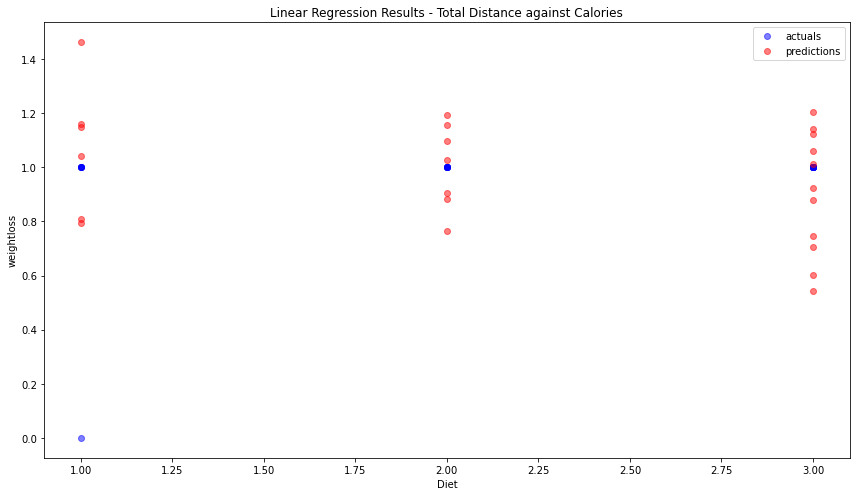

In [57]:
# Visualization of how well the model did by plotting the actual and predicted values
fig, axes = plt.subplots(1, 1, figsize =(12, 7))
axes.plot (X_test.Diet, y_test, 'ob', label ='actuals', alpha=0.5)
axes.plot (X_test.Diet, test_predictions, 'or', label ='predictions', alpha=0.5)
axes.set(xlabel='Diet', ylabel='weightloss')
axes.legend()
axes.set_title('Linear Regression Results - Total Distance against Calories')

In [58]:
# Check the correlation to see if the model tracks the relationship between independent and dependent features
np.corrcoef(y_test, test_predictions) [0][1]

0.17582223855774023

### Results

In [59]:
# Display results in a Dataframe
dict = {'Metric':Metrics, 'Value': Values}
results_comp_df = pd.DataFrame(dict)
results_comp_df

,Metric,Value
0,Training $R^2$ Score,0.492845
1,Training Accuracy,0.492845
2,Training RMSE,0.206424
3,Training MAE,0.148942
4,Testing $R^2$ Score,-0.774793
5,Testing Accuracy,-0.774793
6,Testing RMSE,0.266211
7,Testing MAE,0.202576
